# STUDIO DELL'ERRORE $\sigma_\theta$

Ponendo angoli randomici ognuno di noi ha letto lo stesso valore; l'obiettivo è di stimare l'incertezza associata alla lettura del valore dell'angolo

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'errori.csv'
fr = pd.read_csv(FILE)

##### Conversione primi-radianti

In [2]:
# SARA deg,SARA prim,LUCA deg,LUCA prim,GIO deg,GIO prim

gio = np.array(fr['GIO deg'] +  fr['GIO prim']/60)
sara = np.array(fr['SARA deg'] + fr['SARA prim']/60)
luca = np.array(fr['LUCA deg'] + fr['LUCA prim']/60)

In [8]:
avg = np.array([np.mean([g,s,l]) for s,g,l in zip(gio,sara,luca)]) # angolo medio
std = np.mean([np.std([g,s,l])*3/2 for s,g,l in zip(gio,sara,luca)]) # media delle deviazioni standard (applicate con correzione di Bessel)

print('Media delle deviazioni standard:',std)
print()
print('Distanza media dal valore centrale (solo per veder che Sara prende le misure peggiori):')
delta_gio = np.abs(avg - gio)
delta_sara = np.abs(avg - sara)
delta_luca = np.abs(avg - luca)

sigma_gio = np.mean(delta_gio)
sigma_sara = np.mean(delta_sara)
sigma_luca = np.mean(delta_luca)

print('Gio: ',sigma_gio,'deg\nSara: ', sigma_sara,'deg\nLuca: ', sigma_luca,'deg')

Media delle deviazioni standard: 0.2239883684243746

Distanza media dal valore centrale (solo per veder che Sara prende le misure peggiori):
Gio:  0.10707070707070798 deg
Sara:  0.1772727272727246 deg
Luca:  0.1136363636363659 deg


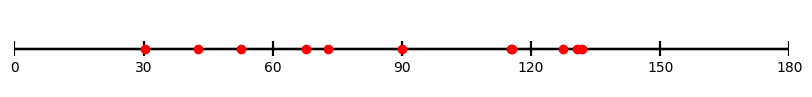

In [38]:
# set up the figure
height = 1
width = 10 * height
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111)
ax.set_xlim(0,180)
ax.set_ylim(0,10)

# draw lines
xticks = np.array([0, 30, 60, 90, 120, 150, 180])
y = 5 * np.ones_like(xticks)
height = 2

plt.hlines(y, 0, 180,color='black')
plt.vlines(xticks, y - height / 2., y + height / 2.,color='black')
plt.vlines(xticks, y - height / 2., y + height / 2.,color='black')

for i in xticks:
    plt.text(i, 2, str(i), horizontalalignment='center')

px = 4
plt.plot(avg,5*np.ones_like(avg), 'ro', ms = 6, mfc = 'r')

plt.axis('off')
plt.show()

In [39]:
# INCERTEZZA: 
incertezza = np.mean(std)
print('sigmaθ (medio): ', np.round(incertezza,3),'deg = ',np.round(incertezza*60,2),' min')
print('sigmaθ (medio): ', np.round(np.radians(incertezza),6),'rad')

sigmaθ (medio):  0.224 deg =  13.44  min
sigmaθ (medio):  0.003909 rad
